# Bias-variance tradeoff

In this lesson, I look at bias-variance tradeoff and related concepts of overfitting and underfitting.

We start with analytic function

$$
f(x) = -0.2 (x-5)^3 + 1.5(x-5)^2 + 3.
$$
We use it to generate random data points. Then we use the data points to make a train-test split and fit a bunch of polynomial models. Finally, we compare performance of these models on testing data set and pick the best. 

As a consequence concepts of **bias**, **variance**, **overfitting**, and **underfitting** will be explained.

## Generating data from Analytic function

The goal of this section is to use analytic function, given above, to generate artificial data.

In [2]:
# Importing main libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Defining auxiliary functions. Specifically, choosing analytic function based on which data points are generated later.


In [3]:

# Function that normalizes np.array
def np_normalize(array):
    minimum = np.min(array)
    maximum = np.max(array)
    return (array - minimum) / (maximum - minimum)

# Defining analytic function from which data points are generated
def f_analytic_single (x):
    return -0.2*(x-5)**3+1.5*(x-5)**2+3

# Vectorizing the analytic function, so that it can be applied to np-arrays
f_analytic_vec = np.vectorize(f_analytic_single)

# Returns normalized value of the anlytic function 
def f_analytic(array):
    return np_normalize(f_analytic_vec(array))

<function matplotlib.pyplot.show(close=None, block=None)>

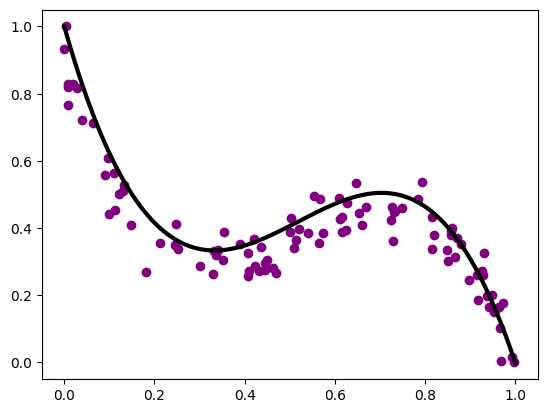

In [4]:
# Parameters
analytic_range = np.array([0.5, 14]) # range of analytic domain
x_spacing= 2000 # number of points in anayltic domain
sample_size = 100 # number of data points generated

x_domain = np.linspace(analytic_range.min(),analytic_range.max(),x_spacing)

# Picking random points from analytic domain
x_random = np.sort(np.random.choice(x_domain , size=sample_size, replace=False))

# Generating analytic function
y_analytic = f_analytic(x_domain)

# Adding random noise to random points from analytic domain
#
#                            standard deviation
noise = np.random.normal(loc=0,scale=0.06,size=sample_size)
y_data = np_normalize(f_analytic(x_random) + noise)

# Normalizing data
x_data = (x_random - analytic_range.min()) / (analytic_range.max() - analytic_range.min())

# Plot generated data points and analytic function
plt.plot(np_normalize(x_domain) ,y_analytic, color="black", linewidth=3)
plt.scatter(x_data, y_data, marker='o', color='purple')
plt.show

In [5]:
# Add everything to one dataframe and choose dependent and independent variable
df = pd.DataFrame({'x':list(x_data), 'y':list(y_data)})
X = df[['x']]
y = df['y']

## Fitting polynomial models

The goal of this section is to calculate test, train **mse** and predictions of a bunch of polynomial models.

In [6]:
# Split data into traing and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

- Import ``scikitlearn`` functions
- Train polynomial models and save both training and testing ``MSE``
- Plot train and test MSE

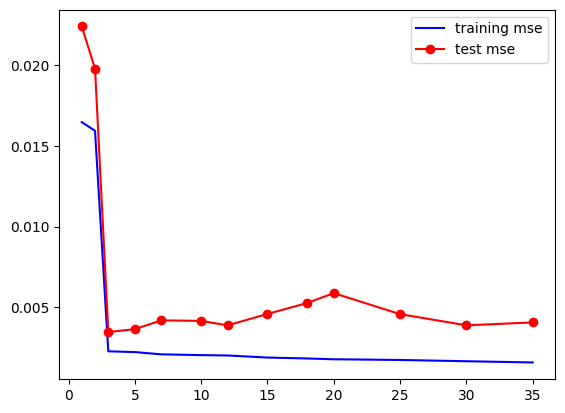

In [7]:
# Import ``scikitlearn`` functions
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Train polynomial models and save both training and testing ``MSE``
poly_degrees = [1,2,3,5,7,10,12,15,18,20,25,30,35]
model_train_mse = []
model_test_mse = []
y_model_train = []
y_model_test = []

for deg in poly_degrees:
    X_poly_train = PolynomialFeatures(degree=deg).fit_transform(X_train)
    X_poly_test = PolynomialFeatures(degree=deg).fit_transform(X_test)
    
    model = LinearRegression(fit_intercept=False)
    model.fit(X_poly_train, y_train)

    y_model_train.append(model.predict(X_poly_train))
    y_model_test.append(model.predict(X_poly_test))

    mse_train = mean_squared_error(y_train, y_model_train[-1])
    mse_test = mean_squared_error(y_test, y_model_test[-1])
    
    model_train_mse.append(mse_train)
    model_test_mse.append(mse_test)

# Plot train and test MSE
plt.plot(poly_degrees, model_train_mse, color='blue')
plt.plot(poly_degrees, model_test_mse, color='red', marker='o')
plt.legend(["training mse", "test mse"])

- **Observation 1:** training MSE is always better than testing MSE.
- **Observation 2:** training MSE decreases as polynomial degree, model complexity, increases. 
- **Observation 3:** minimal test MSE is achieved for degrees close to 3 after initial dip.
- **Observation 4:** after achieving minimum test MSE increases

## Bias-variance tradeoff

Bias-variance tradeoff refers to the mathematical fact that expected value of how much our model differs from true phenomenon (MSE) can be decomposed into three quantities: 
- **Bias** which measures effect of model's simplicity on the predictions.
- **Variance** describes how much effect has variation of a single data point on the coefficent of the model.
- **Irreducible error** describes all variables that are beyond our control and cannot be captured with statistical models.

These are explained in corresponding sections.

In general, as model's complexity (polynomial degree) increases, bias decreases. However, there is also an increase in variance of the model. Hence, the optimal model lies exactly where **the sum of bias and variance** is lowest. 

### Overfitting (Variance)

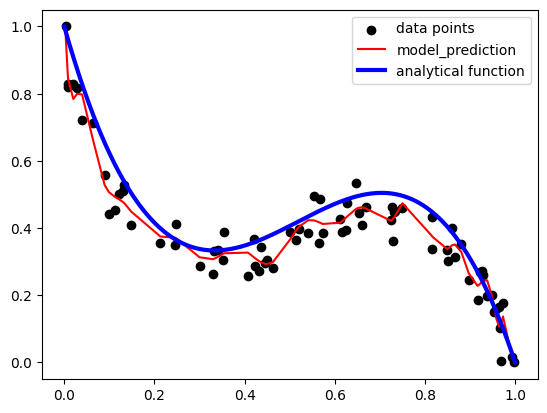

In [8]:
# Plot highest degree model
y_model_train_prediction = list(y_model_train[-1])
df_result = pd.DataFrame({'x':X_train.values.tolist(),'y_train': list(y_train), 'y_pred': y_model_train_prediction})
df_result.sort_values(by='x',inplace=True)

plt.scatter(list(df_result['x']), list(df_result['y_train']), color='black')
plt.plot(list(df_result['x']), list(df_result['y_pred']), color='red')
plt.plot(np_normalize(x_domain) ,y_analytic, color="blue", linewidth=3)
plt.legend(['data points', 'model_prediction', 'analytical function'])
plt.show()

In the figure above, the red line illustrated values preddicted by the model. The line chanes a lot and there are many dips and peaks,

Overfitting occurs when the model tries too hard and follows data too closely. Essentially, the model picks up on the noise in data and it does not generalize well to the testing dataset.

**High variance** of the model means that if the data points are varied then the model can be marquedly different. 

### Underfitting (Bias)

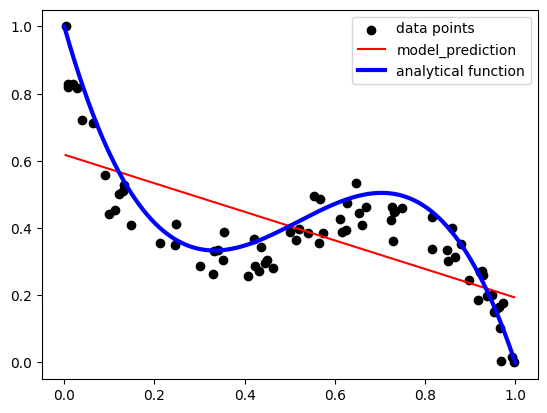

In [9]:
# Plot lowest degree model
y_model_train_prediction = list(y_model_train[0])
df_result = pd.DataFrame({'x':X_train.values.tolist(),'y_train': list(y_train), 'y_pred': y_model_train_prediction})
df_result.sort_values(by='x',inplace=True)

plt.scatter(list(df_result['x']), list(df_result['y_train']), color='black')
plt.plot(list(df_result['x']), list(df_result['y_pred']), color='red')
plt.plot(np_normalize(x_domain) ,y_analytic, color="blue", linewidth=3)
plt.legend(['data points', 'model_prediction', 'analytical function'])
plt.show()

Underfitting occurs when the model is too simple to accurately describe the relationship between dependent and independent variables. In the picture above we see that data clearly follow non-linear trend. Hence, simple linear regression is an inadequate model for this phenomenon. 

We say that the model has **high bias** which means that it is **too simple**.

## The ideal model

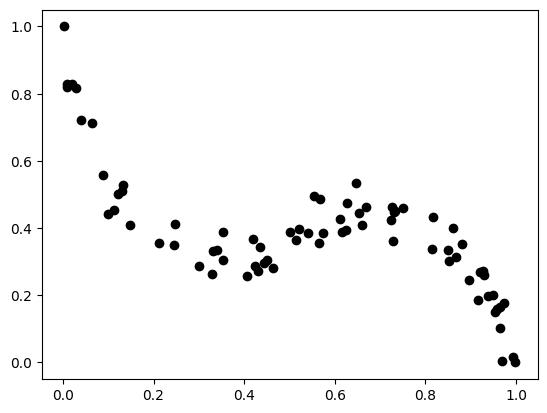

Model that minimizes test MSE has degree 3 . The analytical model from which data was generated has degree 3.


In [10]:
# Plot model with lowest test MSE
opt_mse_index = np.where(np.array(model_test_mse) == np.array(model_test_mse).min())[0]
y_model_train_prediction = list(y_model_train[int(opt_mse_index)])
df_result = pd.DataFrame({'x':X_train.values.tolist(),'y_train': list(y_train), 'y_pred': y_model_train_prediction})
df_result.sort_values(by='x',inplace=True)

plt.scatter(list(df_result['x']), list(df_result['y_train']), color='black')
plt.plot(list(df_result['x']), list(df_result['y_pred']), color='red')
plt.plot(np_normalize(x_domain) ,y_analytic, color="blue", linewidth=3)
plt.legend(['data points', 'model_prediction', 'analytical function'])
plt.show()
print("Model that minimizes test MSE has degree", poly_degrees[int(opt_mse_index)], '. The analytical model from which data was generated has degree 3.')

The ideal model is the one that minimizes the sum of **bias and variance**. In this case, we even recovered the original degree of the polynomial. Look how closely it follows true analytical model in blue!

## Conclusion

In this lesson, I discussed important concepts of **bias** and **variance**. In particular, if a model is too simple it fails to capture the relationship in data. We say that it has high **bias**. On the other hand if the polynomial degree is too high, the model picks up too much noise from data. We say that it has high **variance**. In both cases, the model fails to generalize to testing data and has high MSE. The ideal model minimizes **the sum of bias and variance**. In the next lesson, we will look at validation dataset that helps us to choose righ model complexity for out dataset!